<a href="https://colab.research.google.com/github/Poojitha-916/AICTE-Internship-crop-disease-detection-/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plantdisease


In [5]:
pip install tensorflow matplotlib


In [2]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Class Labels: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 64s 105ms/step - accuracy: 0.7234 - loss: 0.9125 - val_accuracy: 0.8896 - val_loss: 0.3279
Epoch 2/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 43s 82ms/step - accuracy: 0.9080 - loss: 0.2717 - val_accuracy: 0.8996 - val_loss: 0.2978
Epoch 3/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 47s 91ms/step - accuracy: 0.9368 - loss: 0.1903 - val_accuracy: 0.9170 - val_loss: 0.2362
Epoch 4/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 46s 89ms/step - accuracy: 0.9537 - loss: 0.1466 - val_accuracy: 0.9139 - val_loss: 0.2513
Epoch 5/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 43s 83ms/step - accuracy: 0.9633 - loss: 0.1137 - val_accuracy: 0.9231 - val_loss: 0.2385


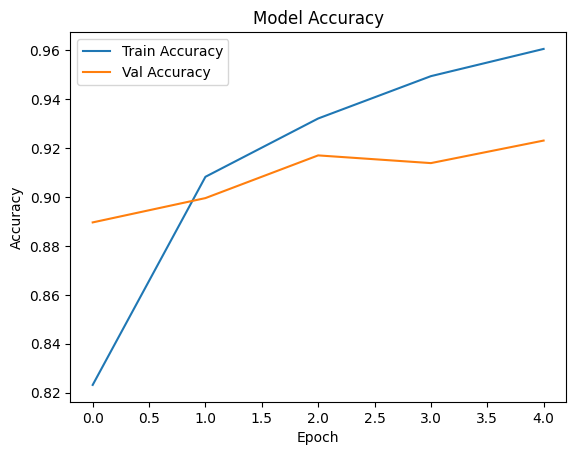

In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import kagglehub

# Step 1: Download dataset
dataset_path = kagglehub.dataset_download("emmarex/plantdisease")
train_dir = os.path.join(dataset_path, 'plantvillage', 'PlantVillage')

# Step 2: Data preprocessing
img_size = 224
batch_size = 32
epochs = 5

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print("Class Labels:", train_data.class_indices)

# Step 3: Build model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train model
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Step 5: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
def test_model(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = list(train_data.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    print(f"Predicted Class: {predicted_label}")

    # Correct advisory logic
    disease_keywords = ["blight", "mosaic", "spot", "rot", "rust", "mildew", "scorch", "curl"]

    if any(word in predicted_label.lower() for word in disease_keywords):
        print("Advisory: ⚠️ Disease detected. Remove infected parts and apply recommended treatment.")
    else:
        print("Advisory: ✅ Plant is healthy. No action needed.")


In [7]:
# TEST IMAGE FROM DATASET (replace this with your own image if needed)
test_img_path = '/content/PLANT IMAGE.jpg'

test_model(test_img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Class: Tomato_Late_blight
Advisory: ⚠️ Disease detected. Remove infected parts and apply recommended treatment.


In [8]:
test_model('/content/img 2 h.jpeg')
test_model('/content/img 3 h.jpeg')
test_model('/content/img 4 h.jpeg')
test_model('/content/img d.jpeg')
test_model('/content/img m 1.jpeg')
test_model('/content/img v.jpeg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Class: Tomato_healthy
Advisory: ✅ Plant is healthy. No action needed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class: Tomato_Late_blight
Advisory: ⚠️ Disease detected. Remove infected parts and apply recommended treatment.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class: Tomato_Bacterial_spot
Advisory: ⚠️ Disease detected. Remove infected parts and apply recommended treatment.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: Tomato_Late_blight
Advisory: ⚠️ Disease detected. Remove infected parts and apply recommended treatment.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Class: Tomato_Late_blight
Advisory: ⚠️ Disease detected. Remove infected parts and apply recommended treatment.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Class: Tomato_Early_blight
Advisory: ⚠️ Disease detected. Remove infected parts and apply recommended treatment.
